In [9]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

In [11]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [4]:
# 미친 중독

# https://novel.naver.com/webnovel/detail?novelId=994958&volumeNo={i}

for i in range(193,194):
    url = f'https://novel.naver.com/webnovel/detail?novelId=876187&volumeNo={i}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('div.detail_view_content')[0].text
    liss = re.compile('[ㄱ-ㅎ가-힣]+').findall(lis)
    print(liss)
    print('='*120)
    print('='*120)
    print('='*120)

['기분', '나쁘게', '듣지', '말란', '소리가', '두', '번이나', '나왔단', '건', '말하는', '사람도', '알고', '있단', '거다', '자기가', '기분', '나쁘게', '들릴', '소리를', '하고', '있단', '걸', '나는', '입을', '네모나게', '벌리고', '그를', '쳐다보았다', '떡돌이는', '내', '시선이', '길어질수록', '점점', '움츠러들었다', '하지만', '말을', '바꾸지는', '않는', '걸', '보니', '정말로', '신신당부하기', '위해', '온', '모양이었다', '여기서', '뭐라고', '하겠는가', '그럼', '오지', '말라', '해', '떡돌이는', '좀', '놀란', '눈으로', '나를', '바라보다가', '한숨을', '내쉬며', '달래는', '투로', '말했다', '누이는', '네가', '걱정되어', '온', '건데', '반숙아', '그저', '고궐', '이야기만', '안', '꺼냈으면', '하는', '거지', '않으냐', '다른', '이야기를', '하지', '말란', '것도', '아니고', '그런데', '그런', '말을', '듣기', '싫으면', '오지', '말라니', '고궐', '이야기를', '해보면', '공주', '전하가', '가짜인지', '진짜인지', '알', '수', '있을', '거라', '생각했어', '솔직히', '말하자면', '반숙아', '너는', '내', '누이가', '가짜이든', '진짜이든', '무어라고', '할', '처지가', '아니잖느냐', '이번에는', '내가', '놀란', '눈으로', '그를', '쳐다보았다', '솔직히', '인정하자면', '맞는', '말이었다', '그리고', '때로는', '맞는', '말이라', '더', '화날', '때가', '있는', '법이다', '떡돌이는', '자기도', '그', '말을', '꺼낸', '게', '좀', '후회가', '되는', '듯', '바로', '사과했다', '미안', '나는', '내', '배를', '손으로', '감싸고서'

# 토큰화 및 불용어 제거

In [5]:
liss

['기분',
 '나쁘게',
 '듣지',
 '말란',
 '소리가',
 '두',
 '번이나',
 '나왔단',
 '건',
 '말하는',
 '사람도',
 '알고',
 '있단',
 '거다',
 '자기가',
 '기분',
 '나쁘게',
 '들릴',
 '소리를',
 '하고',
 '있단',
 '걸',
 '나는',
 '입을',
 '네모나게',
 '벌리고',
 '그를',
 '쳐다보았다',
 '떡돌이는',
 '내',
 '시선이',
 '길어질수록',
 '점점',
 '움츠러들었다',
 '하지만',
 '말을',
 '바꾸지는',
 '않는',
 '걸',
 '보니',
 '정말로',
 '신신당부하기',
 '위해',
 '온',
 '모양이었다',
 '여기서',
 '뭐라고',
 '하겠는가',
 '그럼',
 '오지',
 '말라',
 '해',
 '떡돌이는',
 '좀',
 '놀란',
 '눈으로',
 '나를',
 '바라보다가',
 '한숨을',
 '내쉬며',
 '달래는',
 '투로',
 '말했다',
 '누이는',
 '네가',
 '걱정되어',
 '온',
 '건데',
 '반숙아',
 '그저',
 '고궐',
 '이야기만',
 '안',
 '꺼냈으면',
 '하는',
 '거지',
 '않으냐',
 '다른',
 '이야기를',
 '하지',
 '말란',
 '것도',
 '아니고',
 '그런데',
 '그런',
 '말을',
 '듣기',
 '싫으면',
 '오지',
 '말라니',
 '고궐',
 '이야기를',
 '해보면',
 '공주',
 '전하가',
 '가짜인지',
 '진짜인지',
 '알',
 '수',
 '있을',
 '거라',
 '생각했어',
 '솔직히',
 '말하자면',
 '반숙아',
 '너는',
 '내',
 '누이가',
 '가짜이든',
 '진짜이든',
 '무어라고',
 '할',
 '처지가',
 '아니잖느냐',
 '이번에는',
 '내가',
 '놀란',
 '눈으로',
 '그를',
 '쳐다보았다',
 '솔직히',
 '인정하자면',
 '맞는',
 '말이었다',
 '그리고',
 '때로는',
 '맞는',
 '말이라',
 '더',
 '화날',


In [6]:
liss = [j for j in liss if len(j) >= 2]

In [7]:
liss

['기분',
 '나쁘게',
 '듣지',
 '말란',
 '소리가',
 '번이나',
 '나왔단',
 '말하는',
 '사람도',
 '알고',
 '있단',
 '거다',
 '자기가',
 '기분',
 '나쁘게',
 '들릴',
 '소리를',
 '하고',
 '있단',
 '나는',
 '입을',
 '네모나게',
 '벌리고',
 '그를',
 '쳐다보았다',
 '떡돌이는',
 '시선이',
 '길어질수록',
 '점점',
 '움츠러들었다',
 '하지만',
 '말을',
 '바꾸지는',
 '않는',
 '보니',
 '정말로',
 '신신당부하기',
 '위해',
 '모양이었다',
 '여기서',
 '뭐라고',
 '하겠는가',
 '그럼',
 '오지',
 '말라',
 '떡돌이는',
 '놀란',
 '눈으로',
 '나를',
 '바라보다가',
 '한숨을',
 '내쉬며',
 '달래는',
 '투로',
 '말했다',
 '누이는',
 '네가',
 '걱정되어',
 '건데',
 '반숙아',
 '그저',
 '고궐',
 '이야기만',
 '꺼냈으면',
 '하는',
 '거지',
 '않으냐',
 '다른',
 '이야기를',
 '하지',
 '말란',
 '것도',
 '아니고',
 '그런데',
 '그런',
 '말을',
 '듣기',
 '싫으면',
 '오지',
 '말라니',
 '고궐',
 '이야기를',
 '해보면',
 '공주',
 '전하가',
 '가짜인지',
 '진짜인지',
 '있을',
 '거라',
 '생각했어',
 '솔직히',
 '말하자면',
 '반숙아',
 '너는',
 '누이가',
 '가짜이든',
 '진짜이든',
 '무어라고',
 '처지가',
 '아니잖느냐',
 '이번에는',
 '내가',
 '놀란',
 '눈으로',
 '그를',
 '쳐다보았다',
 '솔직히',
 '인정하자면',
 '맞는',
 '말이었다',
 '그리고',
 '때로는',
 '맞는',
 '말이라',
 '화날',
 '때가',
 '있는',
 '법이다',
 '떡돌이는',
 '자기도',
 '말을',
 '꺼낸',
 '후회가',
 '되는',
 '바로',
 '사과했다',
 '미안',

In [8]:
okt = Okt()

token=[]

for i in liss:
    token.append(okt.morphs(i))
    
    

In [9]:
token

[['기분'],
 ['나쁘게'],
 ['듣지'],
 ['말란'],
 ['소리', '가'],
 ['번', '이나'],
 ['나왔단'],
 ['말', '하는'],
 ['사람', '도'],
 ['알', '고'],
 ['있단'],
 ['거', '다'],
 ['자기', '가'],
 ['기분'],
 ['나쁘게'],
 ['들릴'],
 ['소리', '를'],
 ['하고'],
 ['있단'],
 ['나', '는'],
 ['입', '을'],
 ['네', '모나', '게'],
 ['벌리고'],
 ['그', '를'],
 ['쳐다보았다'],
 ['떡', '돌이', '는'],
 ['시선', '이'],
 ['길어질수록'],
 ['점점'],
 ['움츠러들었다'],
 ['하지만'],
 ['말', '을'],
 ['바꾸지는'],
 ['않는'],
 ['보니'],
 ['정말로'],
 ['신신당부', '하기'],
 ['위해'],
 ['모양', '이었다'],
 ['여기', '서'],
 ['뭐라고'],
 ['하겠는가'],
 ['그럼'],
 ['오지'],
 ['말라'],
 ['떡', '돌이', '는'],
 ['놀란'],
 ['눈', '으로'],
 ['나를'],
 ['바라보다가'],
 ['한숨', '을'],
 ['내쉬며'],
 ['달래는'],
 ['투', '로'],
 ['말', '했다'],
 ['누', '이', '는'],
 ['네', '가'],
 ['걱정', '되어'],
 ['건데'],
 ['반숙', '아'],
 ['그저'],
 ['고', '궐'],
 ['이야기', '만'],
 ['꺼냈으면'],
 ['하는'],
 ['거지'],
 ['않으냐'],
 ['다른'],
 ['이야기', '를'],
 ['하지'],
 ['말란'],
 ['것', '도'],
 ['아니고'],
 ['그런데'],
 ['그런'],
 ['말', '을'],
 ['듣기'],
 ['싫으면'],
 ['오지'],
 ['말', '라니'],
 ['고', '궐'],
 ['이야기', '를'],
 ['해보면'],
 ['공주'],
 ['전하', '가'],
 ['가짜'

In [10]:
tokenize = []

for tok in token:
    for to in tok:
        if len(to) >=2:
            tokenize.append(to)
        

In [11]:
tokenize

['기분',
 '나쁘게',
 '듣지',
 '말란',
 '소리',
 '이나',
 '나왔단',
 '하는',
 '사람',
 '있단',
 '자기',
 '기분',
 '나쁘게',
 '들릴',
 '소리',
 '하고',
 '있단',
 '모나',
 '벌리고',
 '쳐다보았다',
 '돌이',
 '시선',
 '길어질수록',
 '점점',
 '움츠러들었다',
 '하지만',
 '바꾸지는',
 '않는',
 '보니',
 '정말로',
 '신신당부',
 '하기',
 '위해',
 '모양',
 '이었다',
 '여기',
 '뭐라고',
 '하겠는가',
 '그럼',
 '오지',
 '말라',
 '돌이',
 '놀란',
 '으로',
 '나를',
 '바라보다가',
 '한숨',
 '내쉬며',
 '달래는',
 '했다',
 '걱정',
 '되어',
 '건데',
 '반숙',
 '그저',
 '이야기',
 '꺼냈으면',
 '하는',
 '거지',
 '않으냐',
 '다른',
 '이야기',
 '하지',
 '말란',
 '아니고',
 '그런데',
 '그런',
 '듣기',
 '싫으면',
 '오지',
 '라니',
 '이야기',
 '해보면',
 '공주',
 '전하',
 '가짜',
 '인지',
 '진짜',
 '인지',
 '있을',
 '생각',
 '했어',
 '솔직히',
 '하자면',
 '반숙',
 '가짜',
 '이든',
 '진짜',
 '이든',
 '무어',
 '라고',
 '처지',
 '아니잖느냐',
 '이번',
 '에는',
 '놀란',
 '으로',
 '쳐다보았다',
 '솔직히',
 '인정',
 '하자면',
 '맞는',
 '말이었다',
 '그리고',
 '때로는',
 '맞는',
 '이라',
 '화날',
 '있는',
 '이다',
 '돌이',
 '자기',
 '꺼낸',
 '후회',
 '되는',
 '바로',
 '사과',
 '했다',
 '미안',
 '으로',
 '감싸고서',
 '에게서',
 '걸음',
 '떨어져',
 '앉았다',
 '장공',
 '주가',
 '진짜',
 '인지',
 '가짜',
 '맞아',
 '상관없어',
 '하지만',
 '얽혀',
 

# 감성사전

In [12]:
df = pd.read_excel('감성사전_편집.xlsx', index_col='Unnamed: 0')
df

,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
가련하다,1,0,0,0,0,0,0,0,0,0,0
가슴 아프다,1,0,0,0,0,0,0,0,0,0,0
가슴앓이,1,0,0,0,0,0,0,0,0,0,0
가엾다,1,0,0,0,0,0,0,0,0,0,0
각박하다,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
광대,1,0,0,0,1,0,0,0,0,0,0
한계였다,1,0,0,0,0,0,0,0,0,0,0
멸망했다,1,0,0,0,0,0,0,0,0,0,0
씁쓸한,1,0,0,0,0,0,0,0,0,0,0


In [13]:
df.columns[df.loc['곧장',:] == 1]

KeyError: '곧장'

In [ ]:
del df['Unnamed: 0']

# 웹소설 / 감성사전 적용시켜보기

In [ ]:
from collections import Counter

In [14]:
for i in tokenize:
    for j in df.index:
        if i == j:
            print(i)

나쁘게
나쁘게
시선
한숨
걱정
가짜
가짜
처지
인정
맞는
맞는
후회
가짜
맞아
주저
좋은
안색
좋아서
나쁜
더러
눈치
조심
좋아서
상처
새끼
피해
신경
감싸고
마구
고자질
고자질
걱정
두려워
함부로
개자식
틀어진
신경
험한
눈물
상처
상처
나서서
소란
가다듬고
기절
기절
가뿐하다
심장
느리게
증세
정신
좋아서
기운
문제
좋은
부상
고통
참을
기운
의욕
따뜻하게
안정
마구
따뜻한
효과
따뜻한
괜찮다
좋은
흐뭇하게
분위기
걱정
좋다
괜찮다
수상
화가
흉한
부수
좋은
기운
놀라서
기겁
당황
급히
급히
급히
괜찮다
웃으면서
실망한
눈치
걱정
주춤
비난
시선
거짓말
좋아서
부수
실수
거짓말


In [15]:
# 단어별 개수

counter={}
for i in tokenize:
    for j in df.index:
        if i == j:
            if i in counter:
                counter[i] += 1
            else:
                counter[i] = 1

In [16]:
counter

{'나쁘게': 2,
 '시선': 2,
 '한숨': 1,
 '걱정': 4,
 '가짜': 3,
 '처지': 1,
 '인정': 1,
 '맞는': 2,
 '후회': 1,
 '맞아': 1,
 '주저': 1,
 '좋은': 4,
 '안색': 1,
 '좋아서': 4,
 '나쁜': 1,
 '더러': 1,
 '눈치': 2,
 '조심': 1,
 '상처': 3,
 '새끼': 1,
 '피해': 1,
 '신경': 2,
 '감싸고': 1,
 '마구': 2,
 '고자질': 2,
 '두려워': 1,
 '함부로': 1,
 '개자식': 1,
 '틀어진': 1,
 '험한': 1,
 '눈물': 1,
 '나서서': 1,
 '소란': 1,
 '가다듬고': 1,
 '기절': 2,
 '가뿐하다': 1,
 '심장': 1,
 '느리게': 1,
 '증세': 1,
 '정신': 1,
 '기운': 3,
 '문제': 1,
 '부상': 1,
 '고통': 1,
 '참을': 1,
 '의욕': 1,
 '따뜻하게': 1,
 '안정': 1,
 '따뜻한': 2,
 '효과': 1,
 '괜찮다': 3,
 '흐뭇하게': 1,
 '분위기': 1,
 '좋다': 1,
 '수상': 1,
 '화가': 1,
 '흉한': 1,
 '부수': 2,
 '놀라서': 1,
 '기겁': 1,
 '당황': 1,
 '급히': 3,
 '웃으면서': 1,
 '실망한': 1,
 '주춤': 1,
 '비난': 1,
 '거짓말': 2,
 '실수': 1}

In [42]:
emotion_score = {}

for key in counter.keys():
    for word in df.index:
        if key == word:
            for label in df.columns[df.loc[key,:] == 1]:
                if label in emotion_score:
                    emotion_score[label] += 1
                else:
                    emotion_score[label] = 1
                
                                    
            

In [18]:
emotion_score

{'분노': 6,
 '몽환': 6,
 '슬픔': 10,
 '증오': 6,
 '섹시': 4,
 '브릿락': 7,
 '차분히': 4,
 '기쁨': 6,
 '설렘': 6,
 '긴장감': 12,
 '무서운': 4}

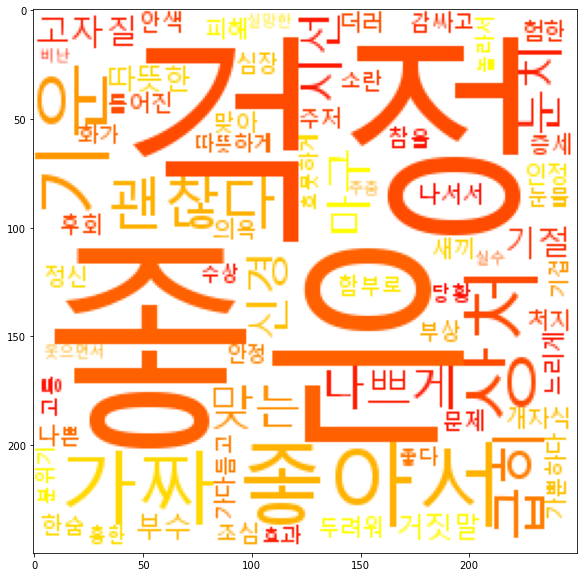

In [19]:
wc = WordCloud(background_color ='white', colormap='autumn', font_path='malgun', width=250, height=250, scale=1.0, max_font_size=100)
gen = wc.generate_from_frequencies(counter)
plt.figure(figsize=(10, 10))
plt.imshow(gen)

In [5]:
import pandas as pd

In [6]:
sss = pd.read_csv('노래가수가사_최종.csv')
sss

,Unnamed: 0,노래,가수,가사
0,0,사랑은 늘 도망가,임영웅,\n\t\t\t\t\t\t\t눈물이 난다 이 길을 걸으면그 사람 손길이 자꾸 생각이...
1,1,코 끝이 찡하게,차가을,\n\t\t\t\t\t\t\t오랜만에 친구를 만나이런저런 얘기를 나눴어얼굴이 안 좋...
2,2,혼자 사랑하고 미워해,백예슬,\n\t\t\t\t\t\t\t흐린 새벽에 무심히 핸드폰 속가만히 들여다보면너와 함께...
3,3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),\n\t\t\t\t\t\t\t비가 오고네가 생각나비가 오고또 비가 오고슬픈 음악이 ...
4,4,Your Lights,이수 (엠씨더맥스),\n\t\t\t\t\t\t\t나는 흙으로부터 왔고다시금 그리 가겠지한낱 그런 삶일 ...
...,...,...,...,...
476,476,Faded,Alan Walker,\n\t\t\t\t\t\t\tYou were the shadow to my ligh...
477,477,혼자라는 느낌,이상은 (=Lee-tzsche),\n\t\t\t\t\t\t\t어지러운 거리의 불빛슬픔 가득한 나의 눈빛외로움 잊으려...
478,478,재와 연기의 노래,못 (Mot),\n\t\t\t\t\t\t\t재로 덮인 하얀 마을에재로 지은 하얀 집에재가 되어 버...
479,479,Scenery,Ashmute (애쉬뮤트),\n\t\t\t\t\t\t\tYou can call me anything어떤 말도 ...


In [7]:
sss['가사'] = sss['가사'].apply(lambda x : x[8:])

In [12]:
okt = Okt()

In [13]:
def text_clean(doc):
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '', doc)
    return text

In [14]:
sss['가사'] = sss['가사'].apply(text_clean)
sss

,Unnamed: 0,노래,가수,가사
0,0,사랑은 늘 도망가,임영웅,눈물이 난다 이 길을 걸으면그 사람 손길이 자꾸 생각이 난다붙잡지 못하고 가슴만 떨...
1,1,코 끝이 찡하게,차가을,오랜만에 친구를 만나이런저런 얘기를 나눴어얼굴이 안 좋아 보인데무슨 일 있냐고물어보...
2,2,혼자 사랑하고 미워해,백예슬,흐린 새벽에 무심히 핸드폰 속가만히 들여다보면너와 함께한 추억 아직 남아서괜스레 또...
3,3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),비가 오고네가 생각나비가 오고또 비가 오고슬픈 음악이 흐르면옛 노래처럼네가 생각나네...
4,4,Your Lights,이수 (엠씨더맥스),나는 흙으로부터 왔고다시금 그리 가겠지한낱 그런 삶일 뿐인데 그게 다인데새벽은 짙고...
...,...,...,...,...
476,476,Faded,Alan Walker,...
477,477,혼자라는 느낌,이상은 (=Lee-tzsche),어지러운 거리의 불빛슬픔 가득한 나의 눈빛외로움 잊으려 거리를 헤매도역시 혼자라는 ...
478,478,재와 연기의 노래,못 (Mot),재로 덮인 하얀 마을에재로 지은 하얀 집에재가 되어 버린 심장을 가진하얀 재 소녀타...
479,479,Scenery,Ashmute (애쉬뮤트),어떤 말도 난 괜찮아서로 다른 세상을 잘 알고 있지만설움이 내 눈가에 위태로...


In [15]:
sss['가사'] = sss['가사'].apply(lambda x : okt.morphs(x))

In [16]:
# sss['가사'] = sss['가사'].apply(lambda x : ','.join(x))

In [17]:
sss

,Unnamed: 0,노래,가수,가사
0,0,사랑은 늘 도망가,임영웅,"[눈물, 이, 난다, 이, 길, 을, 걸으면, 그, 사람, 손길, 이, 자꾸, 생각..."
1,1,코 끝이 찡하게,차가을,"[오랜, 만, 에, 친구, 를, 만나, 이런저런, 얘기, 를, 나눴어, 얼굴, 이,..."
2,2,혼자 사랑하고 미워해,백예슬,"[흐린, 새벽, 에, 무심히, 핸드폰, 속, 가만히, 들여다보면, 너, 와, 함께한..."
3,3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),"[비, 가, 오고, 네, 가, 생각, 나비, 가, 오고, 또, 비, 가, 오고, 슬..."
4,4,Your Lights,이수 (엠씨더맥스),"[나, 는, 흙, 으로부터, 왔고, 다시금, 그리, 가겠지, 한낱, 그런, 삶일, ..."
...,...,...,...,...
476,476,Faded,Alan Walker,[]
477,477,혼자라는 느낌,이상은 (=Lee-tzsche),"[어지러운, 거리, 의, 불빛, 슬픔, 가득한, 나, 의, 눈빛, 외로움, 잊으려,..."
478,478,재와 연기의 노래,못 (Mot),"[재, 로, 덮인, 하얀, 마을, 에, 재, 로, 지은, 하얀, 집, 에, 재, 가..."
479,479,Scenery,Ashmute (애쉬뮤트),"[어떤, 말, 도, 난, 괜찮아서, 로, 다른, 세상, 을, 잘, 알, 고, 있지만..."


In [29]:
for i, ss in enumerate(sss['가사']):
    print(i, ss)

0 ['눈물', '이', '난다', '이', '길', '을', '걸으면', '그', '사람', '손길', '이', '자꾸', '생각', '이', '난다', '붙잡지', '못', '하고', '가슴', '만', '떨었지내', '아름답던', '사람', '아', '사랑', '이란', '게', '참', '쓰린', '거더', '라', '잡으려', '할수록', '더', '멀어지더라', '이별', '이란', '게', '참', '쉬운', '거더', '라', '내', '잊지', '못', '할', '사람', '아', '사랑', '아', '왜', '도망가', '수줍은', '아이', '처럼', '행여', '놓아', '버릴까', '봐', '꼭', '움켜쥐지만', '그리움', '이', '쫓아', '사랑', '은', '늘', '도망가', '잠시', '쉬어가면', '좋을', '텐데바람', '이', '분다', '옷깃', '을', '세워도', '차가운', '이별', '의', '눈물', '이', '차올라', '잊지', '못', '해서', '가슴', '에', '사무친내', '소중했던', '사람', '아', '사랑', '아', '왜', '도망가', '수줍은', '아이', '처럼', '행여', '놓아', '버릴까', '봐', '꼭', '움켜쥐지만', '그리움', '이', '쫓아', '사랑', '은', '늘', '도망가', '잠시', '쉬어가면', '좋을', '텐데', '기다림', '도', '애', '태움도', '다', '버려야', '하는데', '무얼', '찾아', '이', '길', '을', '서성일까', '무얼', '찾아', '여기', '있나', '사랑', '아', '왜', '도망가', '수줍은', '아이', '처럼', '행여', '놓아', '버릴까', '봐', '꼭', '움켜쥐지만', '그리움', '이', '쫓아', '사랑', '은', '늘', '도망가', '잠시', '쉬어가면', '좋을', '텐데', '잠시', '쉬어가면', '좋을', '텐데']
1 ['오랜', '만', '에', '친구', '를'

In [118]:
em = {}
def magic(x):
    
    for key in sss.loc[x, '가사']:
        for word in df.index:
            if key == word:
                for label in df.columns[df.loc[key,:] == 1]:
                    if label in em:
                        em[label] += 1
                    else:
                        em[label] = 1
    

In [126]:
magic(3)

In [121]:
magic(4)

In [127]:
em

{'슬픔': 43,
 '기쁨': 16,
 '분노': 6,
 '긴장감': 6,
 '증오': 11,
 '설렘': 18,
 '차분히': 3,
 '섹시': 4,
 '무서운': 1,
 '몽환': 1}

In [108]:
em_score = {}

for key in sss.loc[0, '가사']:
        for word in df.index:
            if key == word:
                for label in df.columns[df.loc[key,:] == 1]:
                    if label in em_score:
                        em_score[label] += 1
                    else:
                        em_score[label] = 1

In [109]:
em_score

{'슬픔': 4, '섹시': 2, '설렘': 11, '몽환': 3, '긴장감': 1}

In [103]:
test = {}

for key in sss.loc[0,'가사']:
    for word in df.index:
        if key == word:
            0
                for label in df.columns[df.loc[key,:] == 1]:
                    if label in test:
                        test[label] += 1
                    else:
                        test[label] = 1
        

In [104]:
test

{'슬픔': 4, '섹시': 2, '설렘': 11, '몽환': 3, '긴장감': 1}